Mike Leske  
R00183658

# Question1_2_1

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from keras.utils import np_utils
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

TensorFlow 2.x selected.
2.2.0-rc1


Using TensorFlow backend.


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# reshape the feature data
train_x = train_x.reshape(train_x.shape[0], 784)
test_x = test_x.reshape(test_x.shape[0], 784)

# normalize feature data
train_x = train_x / 255.0
test_x = test_x / 255.0

print("Shape of training features", train_x.shape)
print("Shape of test features", test_x.shape)

# one hot encode the training labels and get the transpose
train_y = np_utils.to_categorical(train_y, 10)
train_y = train_y.T
print("Shape of training labels", train_y.shape)

# one hot encode the test labels and get the transpose
test_y = np_utils.to_categorical(test_y, 10)
test_y = test_y.T
print("Shape of test labels", test_y.shape)

4423680/4422102 [==============================] - 0s 0us/step
Shape of training features (60000, 784)
Shape of test features (10000, 784)
Shape of training labels (10, 60000)
Shape of test labels (10, 10000)


The train accuracy is: 0.86301666
The train loss     is: 0.40071705
The test accuracy is: 0.8479
The test loss     is: 0.43660504 



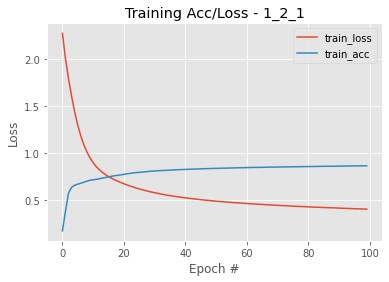

In [3]:
@tf.function
def forward_pass(x, w1, b1, w2, b2):
    # Hidden layer 1
    h1 = tf.add(tf.matmul(tf.cast(x, dtype=tf.float32), tf.cast(w1, dtype=tf.float32)), b1)
    a1 = tf.maximum(h1, 0)
    
    # Softmax layer
    logits = tf.add(tf.matmul(tf.cast(a1, dtype=tf.float32), tf.cast(w2, dtype=tf.float32)), b2)
    softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis=-1, keepdims=True)
    
    return softmax

@tf.function
def cross_entropy(y_pred, y):
    # Transpose y_pred to allow multiplication
    # Calculate Cross-Entropy Loss per instance
    # Calculate total loss
    y_pred = tf.transpose(y_pred)
    ce = -tf.reduce_sum(y * tf.math.log(y_pred), axis=0)
    loss = tf.reduce_mean(ce)
    return loss

@tf.function
def calculate_accuracy(y_pred, y):
    # Take the transpose of y_pred to bring y_pred and y into same shape
    # Create vector with 1.0 if prediction and y have highest probability for same class, 0.0 otherwise
    # Caluculate average of that vector to get accuracy
    predictions = tf.transpose(y_pred)
    predictions_correct = tf.cast(tf.equal(tf.argmax(predictions, axis=0), tf.argmax(y, axis=0)), tf.float32)
    accuracy = tf.reduce_mean(predictions_correct)
    return accuracy

def plot_loss(epochs):
    plt.plot(np.arange(0, epochs), history['loss'], label="train_loss")
    plt.plot(np.arange(0, epochs), history['acc'], label="train_acc")
    plt.title("Training Acc/Loss - 1_2_1")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def optimize(epochs, optimizer, layers):
    input_size = train_x.shape[1]
    num_classes = 10

    #
    # Initialize weights and biases for 2 layers
    #
    w1 = tf.Variable(tf.random.normal([input_size, layers[0]], mean=0.0, stddev=0.05))
    b1 = tf.Variable(tf.zeros([1, layers[0]]))

    w2 = tf.Variable(tf.random.normal([layers[0], num_classes], mean=0.0, stddev=0.05))
    b2 = tf.Variable(tf.zeros([1, num_classes]))

    #
    # Iterate through epochs
    #
    for i in range(epochs):
        with tf.GradientTape() as tape:
            #
            # Execute 1 training cycle
            #
            y_pred = forward_pass(train_x, w1, b1, w2, b2)
            loss = cross_entropy(y_pred, train_y)

            #
            # Add epoch accuracy and loss to history
            #
            history['acc'].append(calculate_accuracy(y_pred, train_y))
            history['loss'].append(loss)

        #
        # Caluclate the gradients for weights and biases 
        # Update weights and biases
        #    
        gradients = tape.gradient(loss, [w1, b1, w2, b2])
        optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2]))

    #
    # Print final training accuracy and regularized loss
    #
    print('The train accuracy is:', history['acc'][-1].numpy())
    print('The train loss     is:', history['loss'][-1].numpy())

    #
    # Calculate predictions, loss and accuracy for test set
    #
    y_pred = forward_pass(test_x, w1, b1, w2, b2)
    accuracy = calculate_accuracy(y_pred, test_y)
    loss = cross_entropy(y_pred, test_y)
    
    #
    # Print test accuracy and regularized loss
    #
    print('The test accuracy is:', accuracy.numpy())
    print('The test loss     is:', loss.numpy(), '\n')

    plot_loss(epochs)

history = {
    'acc': [],
    'loss': []
}
epochs = 100
layers = [300]
opt = tf.keras.optimizers.Adam()
optimize(epochs, opt, layers)